In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import warnings
warnings.filterwarnings('ignore')

Load Dataset / Kaggle https://www.kaggle.com/datasets/atharvaingle/crop-recommendation-dataset

In [2]:
df = pd.read_csv('Crop_recommendation.csv')

In [3]:
print("\nDataset Overview:")
print(f"Shape: {df.shape}")
print(f"\nFirst few rows:")
print(df.head())

print(f"\nStatistical Summary:")
print(df.describe())

print(f"\nCrop Distribution:")
print(df['label'].value_counts())

print(f"\nMissing Values:")
print(df.isnull().sum())

print(f"\nData Types:")
print(df.dtypes)


Dataset Overview:
Shape: (2200, 8)

First few rows:
    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

Statistical Summary:
                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84

Data Preprocessing

In [4]:
X = df.drop('label', axis=1)
y = df['label']

In [5]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [8]:
print(f"\n🏷️ Encoded Crops: {le.classes_}")
print(f"Number of classes: {len(le.classes_)}")


🏷️ Encoded Crops: ['apple' 'banana' 'blackgram' 'chickpea' 'coconut' 'coffee' 'cotton'
 'grapes' 'jute' 'kidneybeans' 'lentil' 'maize' 'mango' 'mothbeans'
 'mungbean' 'muskmelon' 'orange' 'papaya' 'pigeonpeas' 'pomegranate'
 'rice' 'watermelon']
Number of classes: 22


Train-Test Solit 80-20

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

In [10]:
print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")

Training samples: 1760
Testing samples: 440


In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Define models

In [12]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Extra Trees': ExtraTreesClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(n_estimators=100, random_state=42, eval_metric='mlogloss'),
    'LightGBM': LGBMClassifier(n_estimators=100, random_state=42, verbose=-1),
    'CatBoost': CatBoostClassifier(iterations=100, random_state=42, verbose=False),
    'SVM': SVC(kernel='rbf', random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB()
}


Store Results

In [13]:
results = {
    'Model': [],
    'Training Accuracy': [],
    'Testing Accuracy': [],
    'CV Mean': [],
    'CV Std': []
}

In [15]:
for name, model in models.items():
    print(f"\nTraining {name}...")
    
    
    if name in ['Logistic Regression', 'SVM', 'KNN']:
        X_tr, X_te = X_train_scaled, X_test_scaled
    else:
        X_tr, X_te = X_train, X_test
    
    
    model.fit(X_tr, y_train)
    
    
    y_train_pred = model.predict(X_tr)
    y_test_pred = model.predict(X_te)
    
    train_acc = accuracy_score(y_train, y_train_pred) * 100
    test_acc = accuracy_score(y_test, y_test_pred) * 100
    
    # Cross-validation (5-fold)
    cv_scores = cross_val_score(model, X_tr, y_train, cv=5, scoring='accuracy')
    cv_mean = cv_scores.mean() * 100
    cv_std = cv_scores.std() * 100
    
    # Store results
    results['Model'].append(name)
    results['Training Accuracy'].append(train_acc)
    results['Testing Accuracy'].append(test_acc)
    results['CV Mean'].append(cv_mean)
    results['CV Std'].append(cv_std)
    
    print(f"{name}:")
    print(f"   Training Accuracy: {train_acc:.2f}%")
    print(f"   Testing Accuracy: {test_acc:.2f}%")
    print(f"   CV Mean: {cv_mean:.2f}% (±{cv_std:.2f}%)")


Training Logistic Regression...
Logistic Regression:
   Training Accuracy: 97.39%
   Testing Accuracy: 97.27%
   CV Mean: 96.76% (±1.13%)

Training Decision Tree...
Decision Tree:
   Training Accuracy: 100.00%
   Testing Accuracy: 97.95%
   CV Mean: 98.52% (±0.75%)

Training Random Forest...
Random Forest:
   Training Accuracy: 100.00%
   Testing Accuracy: 99.55%
   CV Mean: 99.32% (±0.43%)

Training Extra Trees...
Extra Trees:
   Training Accuracy: 100.00%
   Testing Accuracy: 99.55%
   CV Mean: 99.26% (±0.58%)

Training Gradient Boosting...
Gradient Boosting:
   Training Accuracy: 100.00%
   Testing Accuracy: 98.86%
   CV Mean: 98.75% (±0.69%)

Training XGBoost...
XGBoost:
   Training Accuracy: 100.00%
   Testing Accuracy: 99.32%
   CV Mean: 98.86% (±0.65%)

Training LightGBM...
LightGBM:
   Training Accuracy: 100.00%
   Testing Accuracy: 98.86%
   CV Mean: 98.98% (±0.66%)

Training CatBoost...
CatBoost:
   Training Accuracy: 100.00%
   Testing Accuracy: 99.77%
   CV Mean: 98.98% (±

Create results DataFrame

In [16]:
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('Testing Accuracy', ascending=False)

In [18]:
print("\n" + "="*70)
print("MODEL COMPARISON SUMMARY")
print("="*70)
print(results_df.to_string(index=False))


MODEL COMPARISON SUMMARY
              Model  Training Accuracy  Testing Accuracy   CV Mean   CV Std
           CatBoost         100.000000         99.772727 98.977273 0.637783
      Random Forest         100.000000         99.545455 99.318182 0.425188
      Random Forest         100.000000         99.545455 99.318182 0.425188
        Extra Trees         100.000000         99.545455 99.261364 0.584979
        Naive Bayes          99.488636         99.545455 99.431818 0.508197
        Extra Trees         100.000000         99.545455 99.261364 0.584979
            XGBoost         100.000000         99.318182 98.863636 0.647827
           LightGBM         100.000000         98.863636 98.977273 0.662608
  Gradient Boosting         100.000000         98.863636 98.750000 0.686537
                SVM          98.579545         98.409091 97.613636 0.753778
      Decision Tree         100.000000         97.954545 98.522727 0.749483
      Decision Tree         100.000000         97.954545 98.52

Best Model

In [19]:
best_model_name = results_df.iloc[0]['Model']
best_accuracy = results_df.iloc[0]['Testing Accuracy']

In [ ]:
print(f"\nBEST MODEL: {best_model_name}")
print(f"Testing Accuracy: {best_accuracy:.2f}%")


BEST MODEL: CatBoost
Testing Accuracy: 99.77%


In [25]:
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(f"\n📋 Confusion Matrix Shape: {cm.shape}")


📊 Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.95      1.00      0.98        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        20
       maize       1.00      1.00      1.00        20
       mango       1.00      1.00      1.00        20
   mothbeans       1.00      1.00      1.00        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.00      1.00      1.00        20
 

VISUALIZATIONS

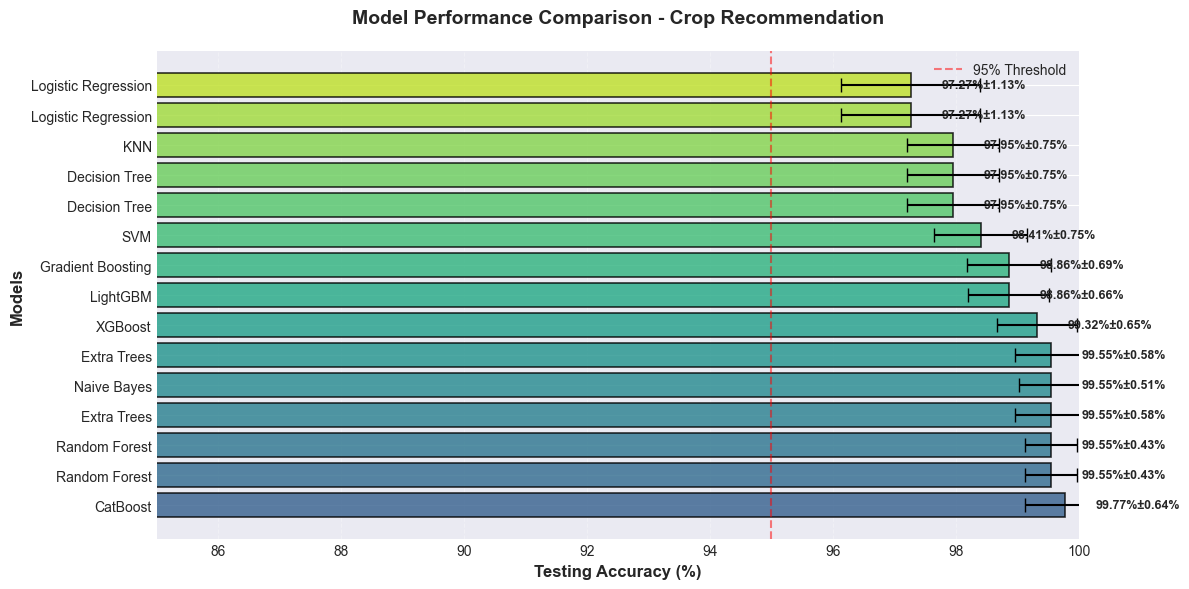

In [23]:
# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Figure 1: Model Accuracy Comparison
fig1, ax1 = plt.subplots(figsize=(12, 6))

x_pos = np.arange(len(results_df))
colors = plt.cm.viridis(np.linspace(0.3, 0.9, len(results_df)))

bars = ax1.barh(x_pos, results_df['Testing Accuracy'], 
                xerr=results_df['CV Std'], capsize=5,
                color=colors, alpha=0.8, edgecolor='black', linewidth=1.2)

ax1.set_yticks(x_pos)
ax1.set_yticklabels(results_df['Model'])
ax1.set_xlabel('Testing Accuracy (%)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Models', fontsize=12, fontweight='bold')
ax1.set_title('Model Performance Comparison - Crop Recommendation', 
              fontsize=14, fontweight='bold', pad=20)
ax1.set_xlim(85, 100)
ax1.grid(axis='x', alpha=0.3, linestyle='--')
ax1.axvline(x=95, color='red', linestyle='--', alpha=0.5, label='95% Threshold')

# Add value labels
for i, (bar, acc, std) in enumerate(zip(bars, results_df['Testing Accuracy'], results_df['CV Std'])):
    width = bar.get_width()
    ax1.text(width + 0.5, bar.get_y() + bar.get_height()/2,
             f'{acc:.2f}%±{std:.2f}%',
             ha='left', va='center', fontsize=9, fontweight='bold')

ax1.legend()
plt.tight_layout()
plt.savefig('crop_model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

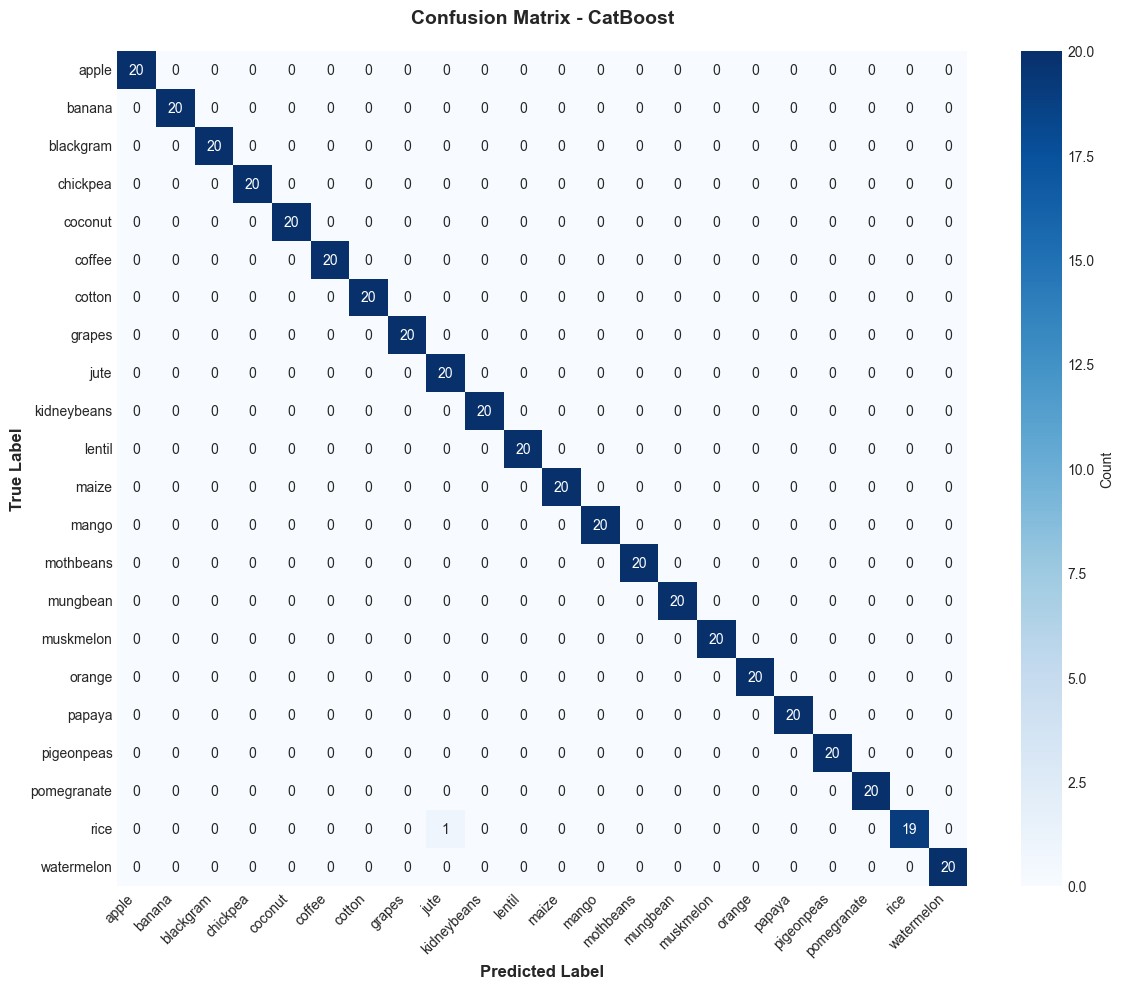

In [26]:
# Figure 2: Confusion Matrix
fig2, ax2 = plt.subplots(figsize=(12, 10))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, yticklabels=le.classes_,
            cbar_kws={'label': 'Count'}, ax=ax2)

ax2.set_xlabel('Predicted Label', fontsize=12, fontweight='bold')
ax2.set_ylabel('True Label', fontsize=12, fontweight='bold')
ax2.set_title(f'Confusion Matrix - {best_model_name}', 
              fontsize=14, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('crop_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()


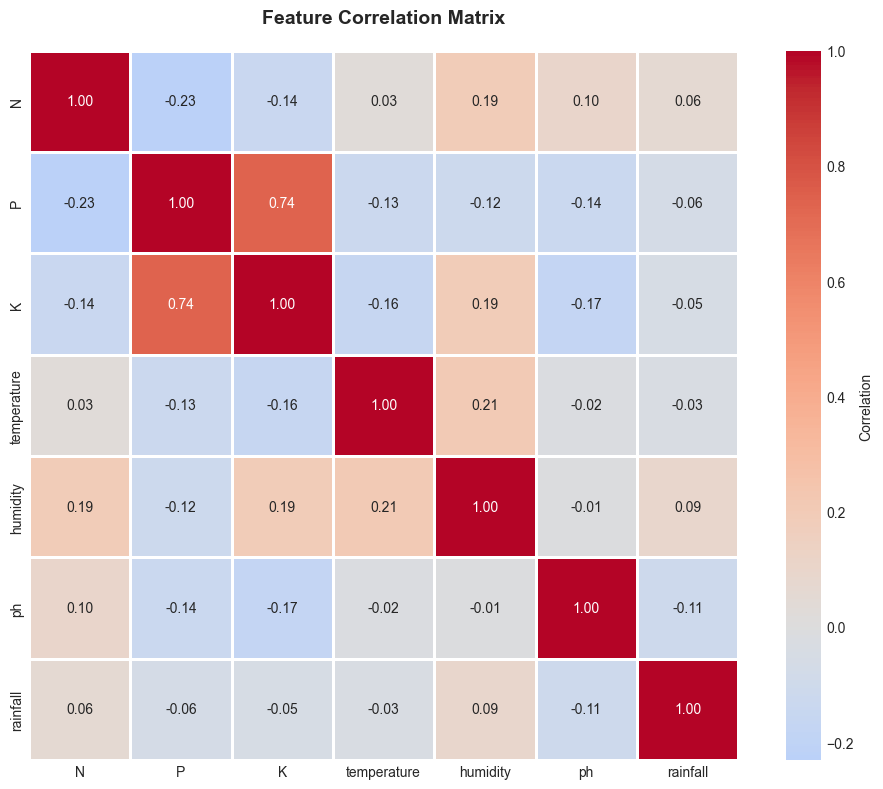

In [27]:
# Figure 3: Feature Correlation Heatmap
fig3, ax3 = plt.subplots(figsize=(10, 8))

correlation = df.drop('label', axis=1).corr()
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, ax=ax3,
            cbar_kws={'label': 'Correlation'})

ax3.set_title('Feature Correlation Matrix', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('crop_feature_correlation.png', dpi=300, bbox_inches='tight')
plt.show()

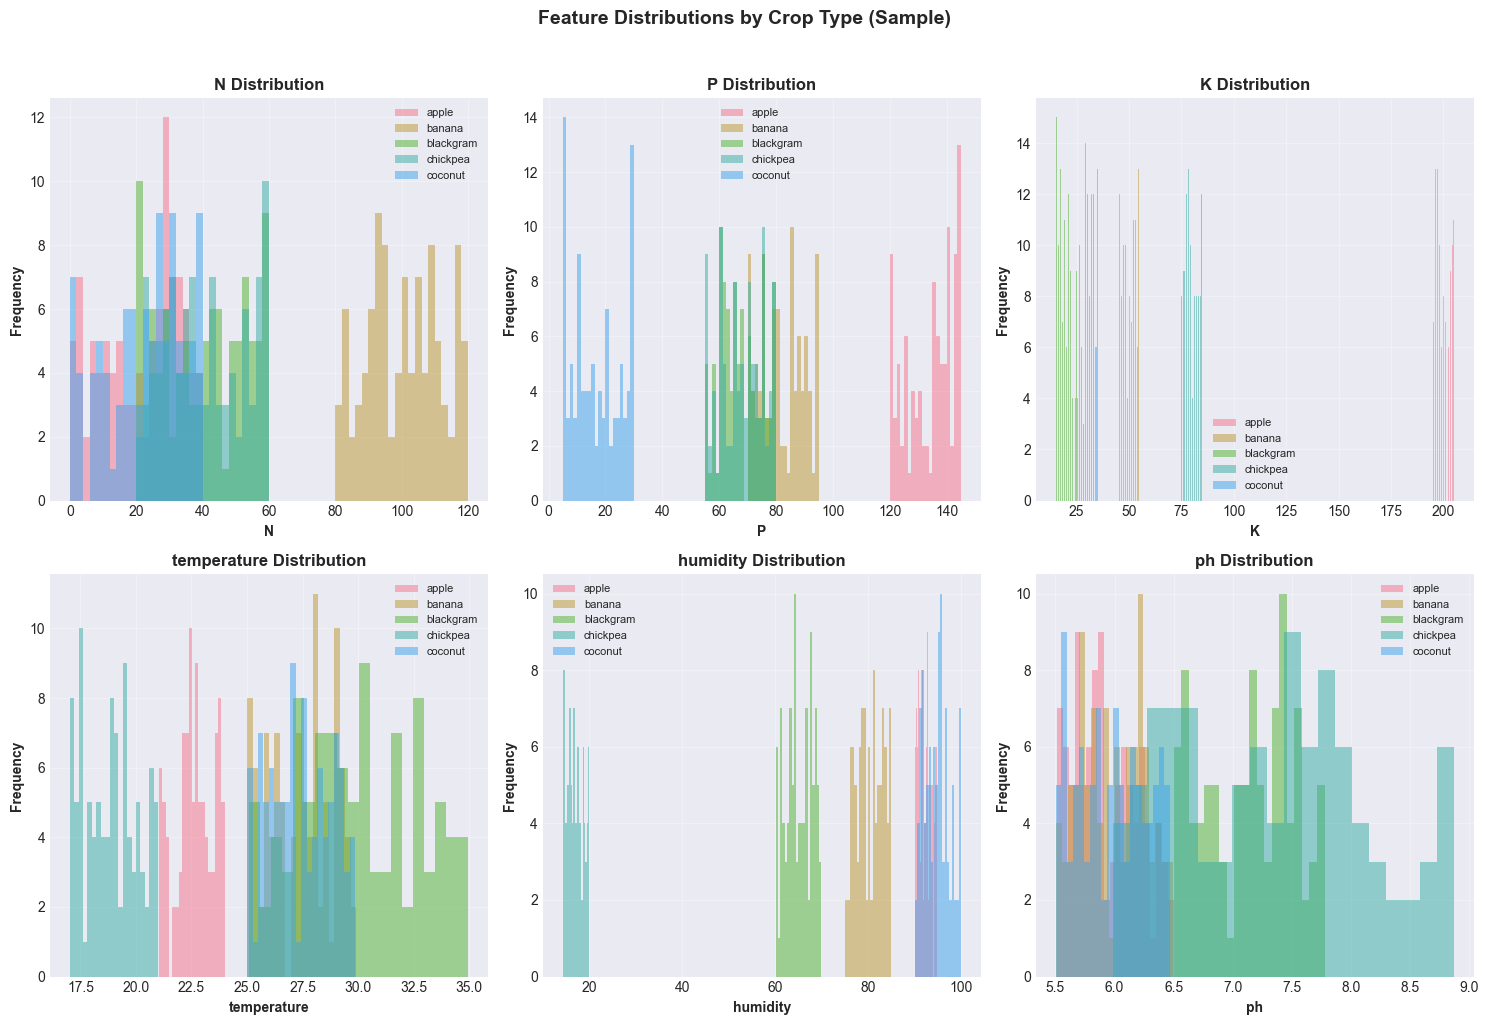

In [29]:
# Figure 4: Feature Distributions by Crop (Sample crops)
sample_crops = le.classes_[:5]  # First 5 crops
features = X.columns

fig4, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, feature in enumerate(features):
    if idx < 6:
        for crop in sample_crops:
            crop_data = df[df['label'] == crop][feature]
            axes[idx].hist(crop_data, alpha=0.5, label=crop, bins=20)
        
        axes[idx].set_xlabel(feature, fontweight='bold')
        axes[idx].set_ylabel('Frequency', fontweight='bold')
        axes[idx].set_title(f'{feature} Distribution', fontweight='bold')
        axes[idx].legend(fontsize=8)
        axes[idx].grid(alpha=0.3)

plt.suptitle('Feature Distributions by Crop Type (Sample)', 
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('crop_feature_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

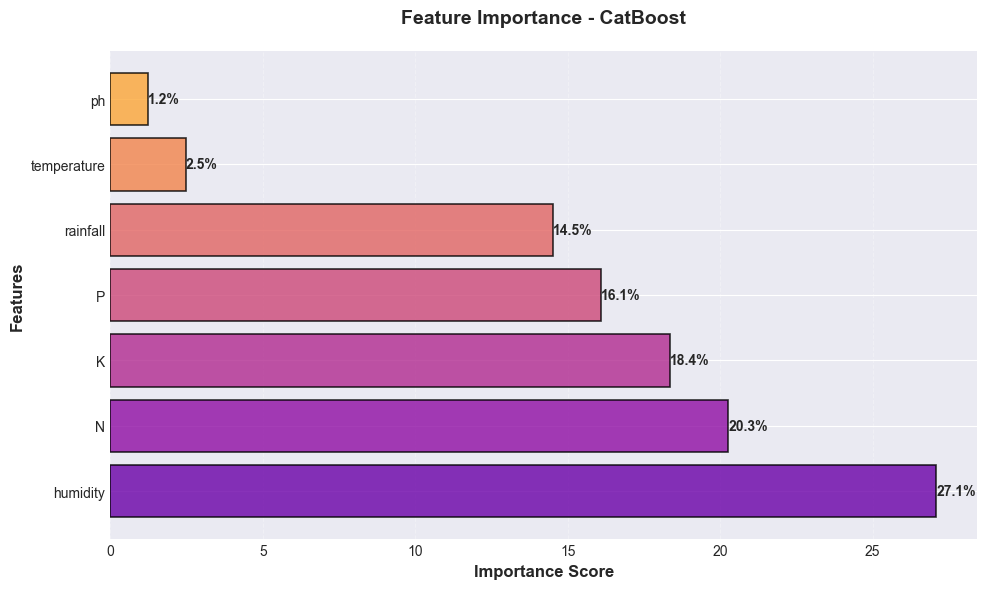

In [28]:
if hasattr(best_model, 'feature_importances_'):
    fig5, ax5 = plt.subplots(figsize=(10, 6))
    
    feature_imp = pd.DataFrame({
        'Feature': X.columns,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    colors_fi = plt.cm.plasma(np.linspace(0.2, 0.8, len(feature_imp)))
    bars = ax5.barh(range(len(feature_imp)), feature_imp['Importance'],
                    color=colors_fi, alpha=0.8, edgecolor='black', linewidth=1.2)
    
    ax5.set_yticks(range(len(feature_imp)))
    ax5.set_yticklabels(feature_imp['Feature'])
    ax5.set_xlabel('Importance Score', fontsize=12, fontweight='bold')
    ax5.set_ylabel('Features', fontsize=12, fontweight='bold')
    ax5.set_title(f'Feature Importance - {best_model_name}', 
                  fontsize=14, fontweight='bold', pad=20)
    ax5.grid(axis='x', alpha=0.3, linestyle='--')
    
    # Add percentage labels
    for i, (bar, imp) in enumerate(zip(bars, feature_imp['Importance'])):
        width = bar.get_width()
        percentage = (imp / feature_imp['Importance'].sum()) * 100
        ax5.text(width + 0.01, bar.get_y() + bar.get_height()/2,
                f'{percentage:.1f}%',
                ha='left', va='center', fontsize=10, fontweight='bold')
    
    plt.tight_layout()
    plt.savefig('crop_feature_importance.png', dpi=300, bbox_inches='tight')
    plt.show()